In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('features 2.csv', header=0)
data = data.drop('Unnamed: 0', axis = 1)
data = data.dropna()
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', 'Classification'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
features = data.columns
features = features.drop('Classification')
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Classification']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [7]:
finalDf = pd.concat([principalDf, data[['Classification']]], axis = 1)
finalDf.head(7)

,principal component 1,principal component 2,Classification
0,6.161798,-3.710210,0.0
1,6.099986,-3.742582,0.0
2,6.033833,-3.786827,0.0
3,6.003482,-3.845169,0.0
4,5.978116,-3.878153,0.0
5,6.035710,-3.909339,1.0
6,6.060260,-3.911393,0.0


In [8]:
ex_variance=np.var(finalDf,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

/opt/apps/anaconda3/envs/wmlce-v1.7.0-py3.7/lib/python3.7/site-packages/pandas/core/nanops.py:670: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


principal component 1    0.0
principal component 2    0.0
Classification           NaN
dtype: float64

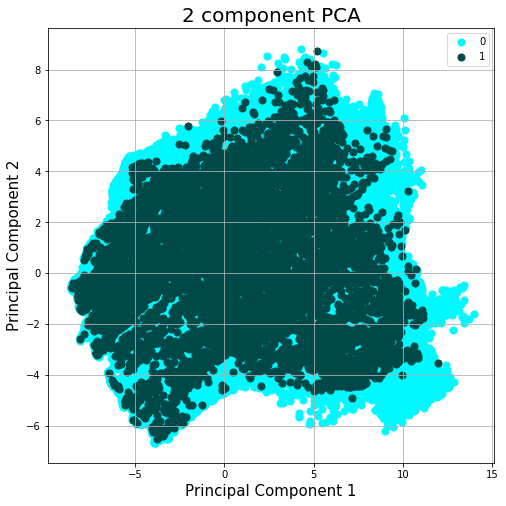

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]

colors = ['#00f9ff','#004949']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Classification'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
pca.explained_variance_ratio_

array([0.57484494, 0.16794124])